## Distribution of traing data is:
(Labels:[0, 1, 2, 3, 4] : count: [10000, 10000, 10000, 10000, 10000] )

 
## Random classifier accuracy

As all the classes are equally distributed in our data, the prediciton probabilty is euqlivalent to prediction accuracy.

Random  classification gives us:

1. Correct prediction Probabilty of a class  =0.2 

Probabilty of each class =0.2

Overall correct clasification probabilty = 5 x (0.2 x 0.2 ) = 0.2

Overall accuracy = 0.2

## Majority Classifier accuracy

As all the classes are equally distributed, we can take any class to be our majority class.

Let us choose apple to be our majority class.
We thus predict each class to be apple, we get all the apple classes correct and everything else is incorrect.


Thus, majority classifer accuracy=0.2


# Code Begins Here:

In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch import autograd
import torch.nn.functional as F

Importing and Preparing Data

In [292]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
label_ids,count=np.unique(labels,return_counts=True)
print(label_ids,count)


(array([0, 1, 2, 3, 4], dtype=uint8), array([10000, 10000, 10000, 10000, 10000]))


In [302]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_normal=np.ndarray(shape=shape_images_flat)

# normalizing images
for index in range(len(images)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat

#  braking data set into train,validation and test sets
train_images=images_normal[0:40000]
train_labels=labels[0:40000]

validation_images=images_normal[40000:45000]
validation_labels=labels[40000:45000]

test_images=images_normal[45000:50000]
test_labels=labels[45000:50000]



In [303]:
HEIGHT,WIDTH=26,26
NUM_CLASSES=5
batch_size=1
NUM_OPT_STEPS=5000
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [304]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear = torch.nn.Linear(HEIGHT * WIDTH, NUM_CLASSES)
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [305]:
model=LinearModel()
params = list(model.parameters())
print(params[0].size())
print(params[1].size())

torch.Size([5, 676])
torch.Size([5])


## Number of weights and Biases
Number of weights= 5*676=3380

Number of Biases= 5 


Optmizers that we used in the previous homeworks are:

1. optim.Adam
2. optim.SGD

The most important arguments are: 
1. Parameters - params (iterable) – iterable of parameters to optimize
2. Learning Rate- lr (float) – learning rate 

In [306]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


In [307]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_images[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    
    optimizer.step()
    return loss.data[0]


In [308]:
def accuracy(y, y_hat):
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [309]:
def approx_accuracy(curr_images,curr_labels,length=-1):
    if length==-1:
        length=len(curr_images)
        
    shuffle_list=np.random.choice(len(curr_images), length)
    shuffled_images=curr_images[shuffle_list]
    shuffled_labels=curr_labels[shuffle_list]
    
    x = autograd.Variable(torch.from_numpy(shuffled_images.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(shuffled_labels.astype(np.int)))
    _,y_hat =torch.max(model(x),1)
    # print(y_hat.size())
    return accuracy(y.data.numpy(), y_hat.data.numpy())
         

In [310]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        print("%6d %5.2f %5.2f" % (epoch*NUM_OPT_STEPS +i, train_accs[-1], val_accs[-1]))


     0  0.19  0.18
   100  0.54  0.53
   200  0.63  0.62
   300  0.68  0.67
   400  0.68  0.66
   500  0.67  0.68
   600  0.69  0.69
   700  0.69  0.69
   800  0.69  0.69
   900  0.71  0.70
  1000  0.68  0.69
  1100  0.71  0.70
  1200  0.72  0.72
  1300  0.68  0.70
  1400  0.69  0.70
  1500  0.68  0.68
  1600  0.70  0.69
  1700  0.65  0.69
  1800  0.69  0.71
  1900  0.71  0.71
  2000  0.70  0.70
  2100  0.71  0.68
  2200  0.70  0.68
  2300  0.69  0.69
  2400  0.70  0.71
  2500  0.68  0.69
  2600  0.70  0.70
  2700  0.72  0.72
  2800  0.72  0.71
  2900  0.70  0.68
  3000  0.73  0.70
  3100  0.72  0.70
  3200  0.69  0.69
  3300  0.71  0.70
  3400  0.73  0.71
  3500  0.71  0.72
  3600  0.71  0.73
  3700  0.69  0.69
  3800  0.73  0.71
  3900  0.68  0.68
  4000  0.70  0.71
  4100  0.70  0.70
  4200  0.69  0.68
  4300  0.70  0.71
  4400  0.70  0.72
  4500  0.67  0.68
  4600  0.68  0.67
  4700  0.71  0.71
  4800  0.68  0.71
  4900  0.71  0.69


# Train and validation, obtained on first attempt
The train and validation accuracies obtained were : 0.22  0.21
The learning rate was too small so convergence was really less, confirmed this by running this with multiple epochs, it took about 100 times more iterations to converge

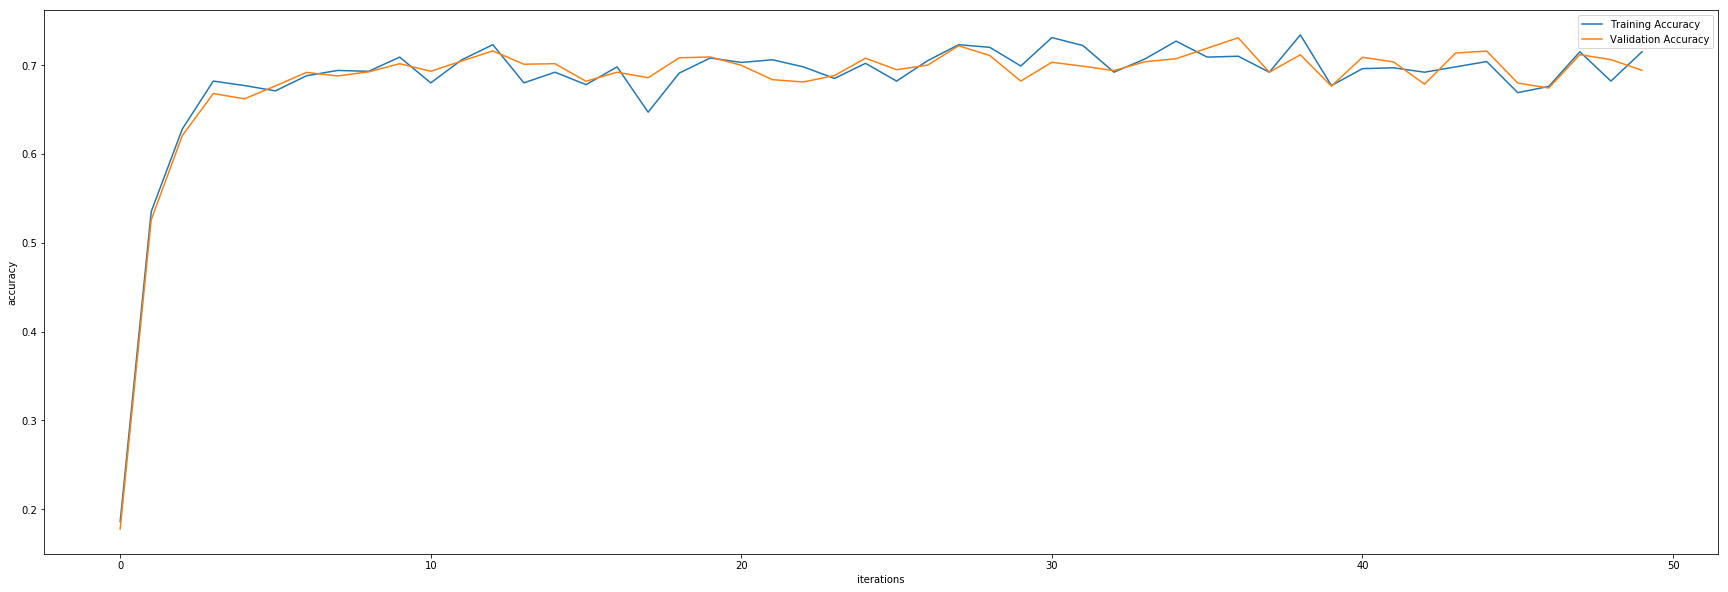

In [311]:
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

In [ ]:
# Highest train and validation accuracies obtained. 
The train and validation accuracies obtained were : 0.71 0.69

Optimizer Used : Adams 
Learning Rate: 1e-3

Best Validation: 0.69